## Sumário:
- EDA 
- Treinamento
- Validação

## Objetivo
NCJNet é um modelo preditivo que visa sugerir cursos para o usuário, a predição é feito sob análise de notas e preferência do usuário.

## Configuração do Ambiente
É necessário o ambiente virtual para o funcionamento, para isso, realize os seguintes comandos no terminal
- /NCJNet$ pipenv shell
- /NCJNet$ pipenv install

Após isso, o ambiente está configurado com todas as bibliotecas necessárias. Para verificar, compile o código a baixo.

In [2]:
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
#import seaborn as sns
#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Todas as bibliotecas são necessárias para a compilação

# EDA

In [3]:
import pandas as pd
import seaborn as sns

## Criar DataFrames dos Datasets 

In [4]:
# Carregar DataFrame de clientes (customers.csv)
df = pd.read_csv('./datasets/RegistrosAcompanhamento2.csv') # leitura dos dados do csv

# visualizar os dados dos 5 primeiros clientes
df.head(5)

,Identificador,Codigo externo do registro,Etapa,Data da criacao,Momento do ultimo ganho,Momento da ultima perda,Na mesma etapa desde,Codigo - Oferta de curso,Nome - Oferta de curso,Identificador da pessoa,...,Literatura,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes
0,19,"""- - -""",Egressos,"""28/03/2025 15:11""","""- - -""","""- - -""","""28/03/2025 15:12""","""- - -""","""- - -""",21,...,"""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -"""
1,18,"""- - -""","""Em Alerta""","""28/03/2025 15:11""","""- - -""","""- - -""","""28/03/2025 15:15""","""- - -""","""- - -""",20,...,"""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -"""
2,17,"""- - -""","""Em Alerta""","""28/03/2025 15:11""","""- - -""","""- - -""","""28/03/2025 15:15""","""- - -""","""- - -""",19,...,"""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -"""
3,16,"""- - -""","""Alunos Regulares""","""28/03/2025 15:11""","""- - -""","""- - -""","""28/03/2025 15:15""","""- - -""","""- - -""",17,...,"""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -"""
4,15,"""- - -""",Egressos,"""28/03/2025 15:11""","""- - -""","""- - -""","""23/05/2025 15:39""","""- - -""","""- - -""",18,...,"""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -"""


In [5]:
# Mostrar estrutura / schema do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Identificador                      8 non-null      int64  
 1    Codigo externo do registro        8 non-null      object 
 2    Etapa                             8 non-null      object 
 3    Data da criacao                   8 non-null      object 
 4    Momento do ultimo ganho           8 non-null      object 
 5    Momento da ultima perda           8 non-null      object 
 6    Na mesma etapa desde              8 non-null      object 
 7    Codigo - Oferta de curso          8 non-null      object 
 8    Nome - Oferta de curso            8 non-null      object 
 9    Identificador da pessoa           8 non-null      int64  
 10   Codigo externo da pessoa          8 non-null      object 
 11   Nome da pessoa                    8 non-null      object 
 12

### Selecionar apenas dados necessários

In [6]:
colunas_desejadas = ["[AE] % de nota geral", "[AE] % de frequencia geral", "[AE] Satisfacao","Matematica", "Portugues", "Literatura", "Redacao", "Quimica", "Fisica", "Biologia", "Geografia", "Historia", "Filosofia", "Sociologia", "Artes"]
df_filtrado = df[colunas_desejadas]
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   [AE] % de nota geral        8 non-null      int64  
 1   [AE] % de frequencia geral  8 non-null      int64  
 2   [AE] Satisfacao             8 non-null      float64
 3   Matematica                  8 non-null      object 
 4   Portugues                   8 non-null      object 
 5   Literatura                  8 non-null      object 
 6   Redacao                     8 non-null      object 
 7   Quimica                     8 non-null      object 
 8   Fisica                      8 non-null      object 
 9   Biologia                    8 non-null      object 
 10  Geografia                   8 non-null      object 
 11  Historia                    8 non-null      object 
 12  Filosofia                   8 non-null      object 
 13  Sociologia                  8 non-null 

In [8]:
#  Medidas estatísticas do DF
df_filtrado.describe()

,[AE] % de nota geral,[AE] % de frequencia geral,[AE] Satisfacao
count,8.000000,8.000000,8.000000
mean,78.250000,84.125000,7.800000
std,12.892412,12.368595,1.271669
min,55.000000,60.000000,5.500000
25%,72.500000,78.750000,7.125000
50%,78.500000,86.500000,7.900000
75%,87.750000,92.750000,8.625000
max,95.000000,98.000000,9.500000


<Axes: xlabel='[AE] % de nota geral'>

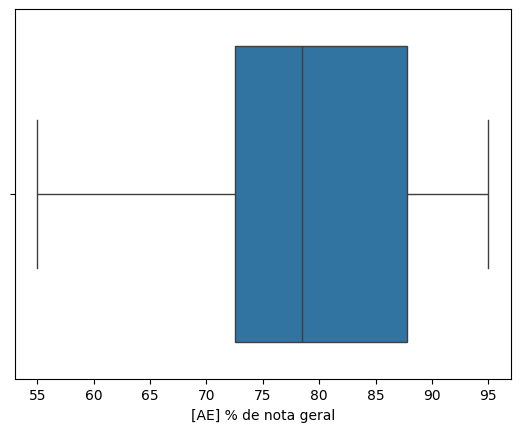

In [9]:
sns.boxplot(x=df_filtrado["[AE] % de nota geral"])

## Treinar modelo Random Forest

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report